<a href="https://colab.research.google.com/github/Paolo20224/ProjectZero/blob/main/PJ2_DolarvsIPSAvsCobre.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [112]:
#Como parte inicial, descargamos la informacion y la cargamos en nuestro cuader en Colab
import pandas as pd
filename = "/content/IPSA vs Dolar vs Cobre.xlsx"
df = pd.read_excel(filename)

1.Depuracion de Datos


In [113]:
# A continuacion revisaremos aquellos datos nulos para ver la integridad de la informacion
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 938 entries, 0 to 937
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Fecha         938 non-null    datetime64[ns]
 1   IPSA          938 non-null    int64         
 2   VarIPSA       938 non-null    float64       
 3   Dólar         938 non-null    float64       
 4   Precio Cobre  916 non-null    float64       
 5   Año           938 non-null    int64         
 6   Mes           938 non-null    object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(1)
memory usage: 51.4+ KB


In [114]:
# Revisaremos los primero diez datos para dimensionar la magnitud de la info
df.head(10)

,Fecha,IPSA,VarIPSA,Dólar,Precio Cobre,Año,Mes
0,2019-01-02,5125,0.0039,694.77,5839.0,2019,Ene
1,2019-01-03,5129,0.0007,697.09,5811.0,2019,Ene
2,2019-01-04,5189,0.0117,697.64,5840.0,2019,Ene
3,2019-01-07,5190,0.0002,688.42,5889.5,2019,Ene
4,2019-01-08,5224,0.0066,679.69,5904.5,2019,Ene
5,2019-01-09,5265,0.0077,680.10,5964.0,2019,Ene
6,2019-01-10,5298,0.0064,678.09,5908.5,2019,Ene
7,2019-01-11,5353,0.0104,677.58,5926.5,2019,Ene
8,2019-01-14,5357,0.0008,675.15,5861.0,2019,Ene
9,2019-01-15,5374,0.0031,674.95,5882.0,2019,Ene


In [115]:
#Lo primero que logramos visualizar son elementos nulos para algunos dias en relacion a los precios del cobre, dada su baja materialidad en términos de dias realizaremos un drop para todas las filas en esos periodos
df2=df
df2 = df2.dropna(subset=["Precio Cobre"])
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 916 entries, 0 to 937
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Fecha         916 non-null    datetime64[ns]
 1   IPSA          916 non-null    int64         
 2   VarIPSA       916 non-null    float64       
 3   Dólar         916 non-null    float64       
 4   Precio Cobre  916 non-null    float64       
 5   Año           916 non-null    int64         
 6   Mes           916 non-null    object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(1)
memory usage: 57.2+ KB


In [116]:
df2.describe()

,IPSA,VarIPSA,Dólar,Precio Cobre,Año
count,916.000000,916.000000,916.000000,916.000000,916.000000
mean,4582.826419,0.000154,772.933100,7545.415939,2020.400655
std,530.322664,0.016097,69.858172,1722.594864,1.082377
min,2876.000000,-0.141100,649.220000,4617.500000,2019.000000
25%,4189.750000,-0.006725,718.320000,5926.500000,2019.000000
50%,4605.000000,0.000000,773.555000,6976.500000,2020.000000
75%,5001.000000,0.007700,813.500000,9357.125000,2021.000000
max,5775.000000,0.096900,1042.970000,10730.000000,2022.000000


In [117]:
#A continuacion analizamos la correlacion entra las variables cuantitativas.
import pandas as pd
corr_df = df.corr(method='pearson')
corr_df.style.background_gradient(cmap='coolwarm')

,IPSA,VarIPSA,Dólar,Precio Cobre,Año
IPSA,1.000000,0.056119,-0.199522,0.041099,-0.013303
VarIPSA,0.056119,1.000000,0.022858,0.012612,0.028522
Dólar,-0.199522,0.022858,1.000000,0.205998,0.653485
Precio Cobre,0.041099,0.012612,0.205998,1.000000,0.802988
Año,-0.013303,0.028522,0.653485,0.802988,1.000000


2. Exploracion y Visualizacion de Datos

In [118]:
df3=df2
y2019_filter=df3["Año"]==2019
y2020_filter=df3["Año"]==2020
y2021_filter=df3["Año"]==2021
y2022_filter=df3["Año"]==2022

a2019=df3.loc[y2019_filter, : ]
a2020=df3.loc[y2020_filter, : ]
a2021=df3.loc[y2021_filter, : ]
a2022=df3.loc[y2022_filter, : ]

X1 = a2019["Mes"]
X2 = a2020["Mes"]
X3 = a2021["Mes"]
X4 = a2022["Mes"]

Y1 = a2019["Dólar"]
Y2 = a2020["Dólar"]
Y3 = a2021["Dólar"]
Y4 = a2022["Dólar"]

Z1 = a2019["Precio Cobre"]
Z2 = a2020["Precio Cobre"]
Z3 = a2021["Precio Cobre"]
Z4 = a2022["Precio Cobre"]

W1 = a2019["IPSA"]
W2 = a2020["IPSA"]
W3 = a2021["IPSA"]
W4 = a2022["IPSA"]

<function matplotlib.pyplot.show(*args, **kw)>

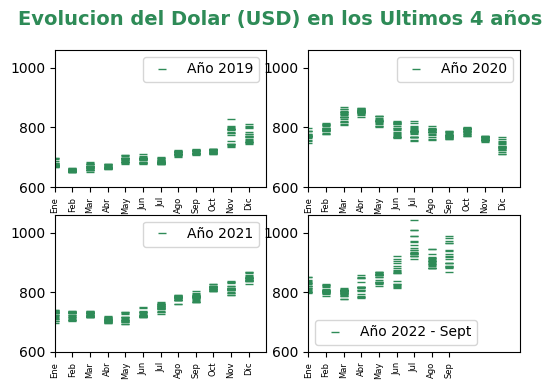

In [119]:
import matplotlib.pyplot as plt

plt.figure(dpi = 100)
plt.suptitle("Evolucion del Dolar (USD) en los Ultimos 4 años", fontsize=14, fontweight="bold",color = "seagreen" )

plt.subplot(221)
plt.plot(X1,Y1,'_', label= "Año 2019" , color = "seagreen",)
plt.xticks(rotation=90, size=6)
plt.axis([0,12,600,1060])
plt.legend()

plt.subplot(222)
plt.plot(X2,Y2,'_', label= "Año 2020" , color = "seagreen")
plt.xticks(rotation=90, size=6)
plt.axis([0,12,600,1060])
plt.legend()

plt.subplot(223)
plt.plot(X3,Y3, '_',label= "Año 2021" , color = "seagreen")
plt.xticks(rotation=90, size=6)
plt.axis([0,12,600,1060])
plt.legend()

plt.subplot(224)
plt.plot(X4,Y4, '_',label= "Año 2022 - Sept" , color = "seagreen")
plt.xticks(rotation=90, size=6)
plt.axis([0,12,600,1060])
plt.legend()

plt.show

<function matplotlib.pyplot.show(*args, **kw)>

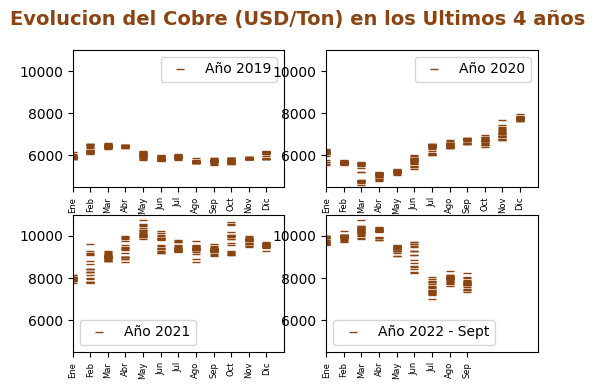

In [120]:
import matplotlib.pyplot as plt

plt.figure(dpi = 100)
plt.suptitle("Evolucion del Cobre (USD/Ton) en los Ultimos 4 años", fontsize=14, fontweight="bold",color = "saddlebrown" )

plt.subplot(221)
plt.plot(X1,Z1,'_', label= "Año 2019" , color = "saddlebrown",)
plt.xticks(rotation=90, size=6)
plt.axis([0,12,4500,11000])
plt.legend()

plt.subplot(222)
plt.plot(X2,Z2,'_', label= "Año 2020" , color = "saddlebrown")
plt.xticks(rotation=90, size=6)
plt.axis([0,12,4500,11000])
plt.legend()

plt.subplot(223)
plt.plot(X3,Z3, '_',label= "Año 2021" , color = "saddlebrown")
plt.xticks(rotation=90, size=6)
plt.axis([0,12,4500,11000])
plt.legend()

plt.subplot(224)
plt.plot(X4,Z4, '_',label= "Año 2022 - Sept" , color = "saddlebrown")
plt.xticks(rotation=90, size=6)
plt.axis([0,12,4500,11000])
plt.legend()

plt.show

<function matplotlib.pyplot.show(*args, **kw)>

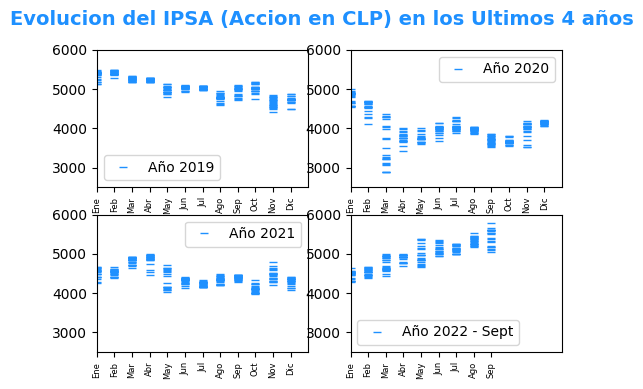

In [121]:
import matplotlib.pyplot as plt

plt.figure(dpi = 100)
plt.suptitle("Evolucion del IPSA (Accion en CLP) en los Ultimos 4 años", fontsize=14, fontweight="bold",color = "dodgerblue" )

plt.subplot(221)
plt.plot(X1,W1,'_', label= "Año 2019" , color = "dodgerblue",)
plt.xticks(rotation=90, size=6)
plt.axis([0,12,2500,6000])
plt.legend()

plt.subplot(222)
plt.plot(X2,W2,'_', label= "Año 2020" , color = "dodgerblue")
plt.xticks(rotation=90, size=6)
plt.axis([0,12,2500,6000])
plt.legend()

plt.subplot(223)
plt.plot(X3,W3, '_',label= "Año 2021" , color = "dodgerblue")
plt.xticks(rotation=90, size=6)
plt.axis([0,12,2500,6000])
plt.legend()

plt.subplot(224)
plt.plot(X4,W4, '_',label= "Año 2022 - Sept" , color = "dodgerblue")
plt.xticks(rotation=90, size=6)
plt.axis([0,12,2500,6000])
plt.legend()

plt.show

<function matplotlib.pyplot.show(*args, **kw)>

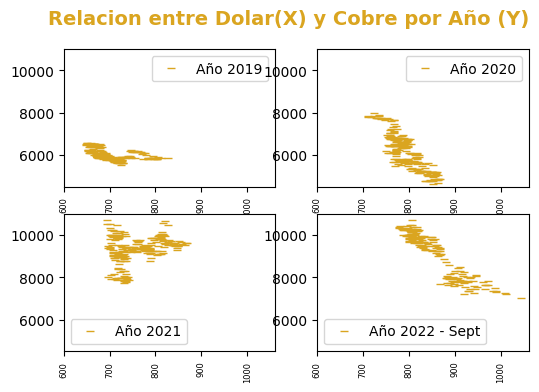

In [130]:
import matplotlib.pyplot as plt

plt.figure(dpi = 100)
plt.suptitle("Relacion entre Dolar(X) y Cobre por Año (Y)", fontsize=14, fontweight="bold",color = "goldenrod" )

plt.subplot(221)
plt.plot(Y1,Z1,'_', label= "Año 2019" , color = "goldenrod",)
plt.xticks(rotation=90, size=6)
plt.axis([600,1060,4500,11000])
plt.legend()

plt.subplot(222)
plt.plot(Y2,Z2,'_', label= "Año 2020" , color = "goldenrod")
plt.xticks(rotation=90, size=6)
plt.axis([600,1060,4500,11000])
plt.legend()

plt.subplot(223)
plt.plot(Y3,Z3, '_',label= "Año 2021" , color = "goldenrod")
plt.xticks(rotation=90, size=6)
plt.axis([600,1060,4500,11000])
plt.legend()

plt.subplot(224)
plt.plot(Y4,Z4, '_',label= "Año 2022 - Sept" , color = "goldenrod")
plt.xticks(rotation=90, size=6)
plt.axis([600,1060,4500,11000])
plt.legend()

plt.show

<function matplotlib.pyplot.show(*args, **kw)>

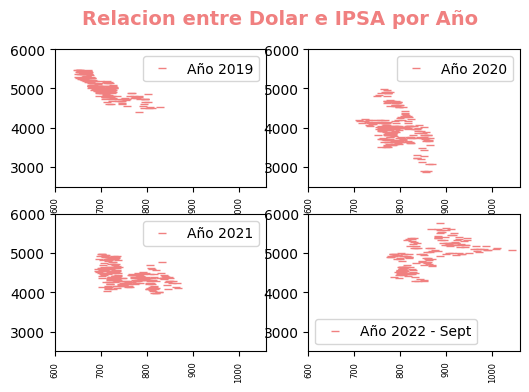

In [129]:
import matplotlib.pyplot as plt

plt.figure(dpi = 100)
plt.suptitle("Relacion entre Dolar(X) e IPSA (Y) por Año", fontsize=14, fontweight="bold",color = "lightcoral" )

plt.subplot(221)
plt.plot(Y1,W1,'_', label= "Año 2019" , color = "lightcoral",)
plt.xticks(rotation=90, size=6)
plt.axis([600,1060,2500,6000])
plt.legend()

plt.subplot(222)
plt.plot(Y2,W2,'_', label= "Año 2020" , color = "lightcoral")
plt.xticks(rotation=90, size=6)
plt.axis([600,1060,2500,6000])
plt.legend()

plt.subplot(223)
plt.plot(Y3,W3, '_',label= "Año 2021" , color = "lightcoral")
plt.xticks(rotation=90, size=6)
plt.axis([600,1060,2500,6000])
plt.legend()

plt.subplot(224)
plt.plot(Y4,W4, '_',label= "Año 2022 - Sept" , color = "lightcoral")
plt.xticks(rotation=90, size=6)
plt.axis([600,1060,2500,6000])
plt.legend()

plt.show

<function matplotlib.pyplot.show(*args, **kw)>

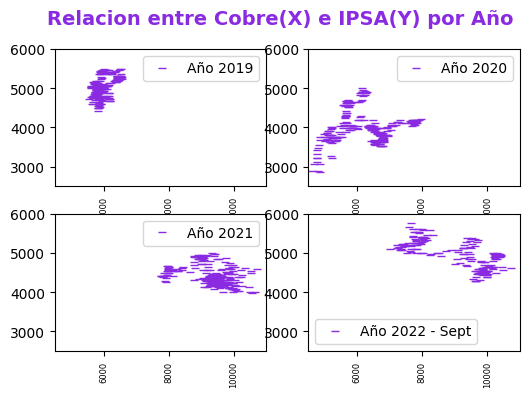

In [133]:
import matplotlib.pyplot as plt

plt.figure(dpi = 100)
plt.suptitle("Relacion entre Cobre(X) e IPSA(Y) por Año", fontsize=14, fontweight="bold",color = "blueviolet" )

plt.subplot(221)
plt.plot(Z1,W1,'_', label= "Año 2019" , color = "blueviolet",)
plt.xticks(rotation=90, size=6)
plt.axis([4500,11000,2500,6000])
plt.legend()

plt.subplot(222)
plt.plot(Z2,W2,'_', label= "Año 2020" , color = "blueviolet")
plt.xticks(rotation=90, size=6)
plt.axis([4500,11000,2500,6000])
plt.legend()

plt.subplot(223)
plt.plot(Z3,W3, '_',label= "Año 2021" , color = "blueviolet")
plt.xticks(rotation=90, size=6)
plt.axis([4500,11000,2500,6000])
plt.legend()

plt.subplot(224)
plt.plot(Z4,W4, '_',label= "Año 2022 - Sept" , color = "blueviolet")
plt.xticks(rotation=90, size=6)
plt.axis([4500,11000,2500,6000])
plt.legend()

plt.show